# Homework 1

## 1. Problem
Consider the following maximization problem

\begin{array}{cl}
\max & (x-1)^{2}+(y-1)^{2} \\
\text { s.t. } & |x|+|y| \leq 1
\end{array}

Plot the feasible region of this problem with the feasible area shaded.
Draw (in dashed lines) the contours of the objective function.
Based on your drawing, find all the optimal solutions and the optimal objective value
of this problem.  There may be multiple optimal solutions.  Find all optimal solutions.

## 1. Solution
The specified constraint implies that x and y should lie in the interval [-1, 1]. We are
going to use this fact to create the contours of the objective function and the feasible
area using the following code

In [96]:
import numpy as np
import matplotlib.pyplot as plt

[]

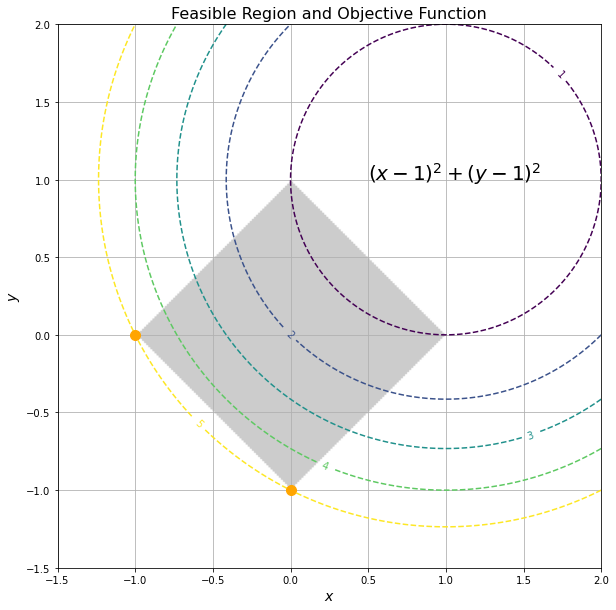

In [97]:
# x and y should be between -1 and 1
d = np.linspace(-2, 2, 300)
x, y = np.meshgrid(d, d)

fig, ax = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor("xkcd:white")

ax.imshow((abs(x) + abs(y) <= 1).astype(int),
           extent=(x.min(), x.max(), y.min(), y.max()),
           origin="lower",
           cmap="Greys",
           alpha = 0.2)

obj = (x - 1) ** 2 + (y - 1) ** 2
levels = np.linspace(1, 5, 5)
cp = ax.contour(x, y, obj, levels, linestyles="dashed")
ax.clabel(cp, inline=True, fontsize=10)
#Plotting solutions
opt_0_x = [0, -1]
opt_0_y = [-1, 0]
ax.plot(opt_0_x, opt_0_y, "o", markersize=10, color="orange")

eq = r"$(x-1)^{2}+(y-1)^{2}$"
ax.text(0.5, 1, eq, fontsize=20)

ax.set_xlabel(r"$x$", size=14)
ax.set_ylabel(r"$y$", size=14)
ax.set_xlim(-1.5,)
ax.set_ylim(-1.5,)
ax.set_title("Feasible Region and Objective Function", size=16)
plt.grid()
plt.plot()

The plot above shows that the maximum value of the objective function occurs when:

\begin{array}{cl}
&x = 0,\; &y = -1 \\
&x = -1,\; &y = 0
\end{array}


And the optimal value is **5**

## 2. Problem
Recall the maximum volume box from Module 1, Lesson 1. Solve the following problem using basic calculus:

\begin{equation}
\max \left\{x(1-2 x)^{2}: 0 \leq x \leq 1 / 2\right\}
\end{equation}

What is the optimal solution and the optimal objective value? Draw the
objective function over the feasible region.

## 2. Solution
To find a local inflexion point, we need to take derivative equal to zero:

\begin{eqnarray*}
\frac{\partial}{\partial x}\left(x(1-2 x)^{2}\right)=0 \\\\
\frac{\partial}{\partial x}\left(x-4 x^{2}+4 x^{3}\right)=0 \\\\
12 x^{2}-8 x+1=0 \\\\
(6 x-1)(2 x-1)=0 \\\\
x_{1}=\frac{1}{6},\; x_{2}=\frac{1}{2} \\
\end{eqnarray*}

There are two solutions that satisfy the constraint $0 \leq x \leq 1 / 2$. To find the
solution that maximizes the function, we need to take the second derivative and check
which value of $x$ yields a negative value, which is considered to be the maximum.

\begin{eqnarray*}
\frac{\partial}{\partial x}\left(12 x^{2}-8 x+1\right)=-8+24 x \\\\
-8+24\left(\frac{1}{2}\right)&=&4 \\
-8+24\left(\frac{1}{6}\right)&=&-4
\end{eqnarray*}

We can see that $\frac {1}{6}$ is the solution that maximizes $x(1-2x)^2$ to the value
of $\frac {2}{27} = 0.074$

The feasible region and the objective function is shown below

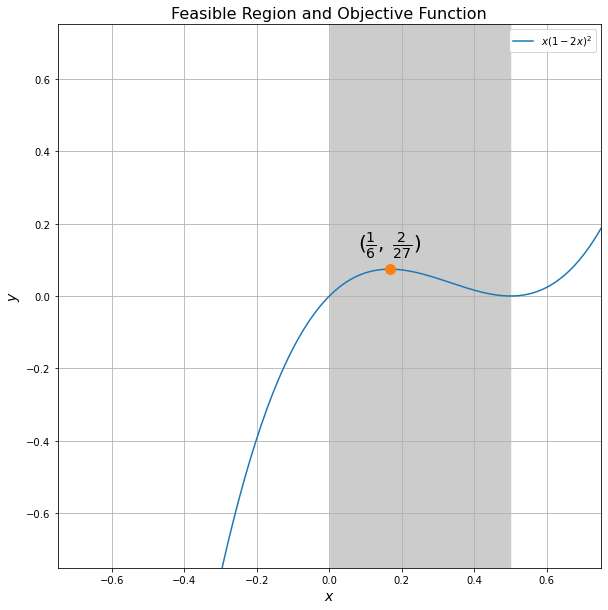

In [98]:
d1 = np.linspace(-0.75, 0.75, 300)
x1, y1 = np.meshgrid(d1, d1)

fig1, ax1 = plt.subplots(figsize=(10, 10))
fig1.patch.set_facecolor("xkcd:white")

ax1.imshow(((x1 >= 0) & (x1 <= 0.5)).astype(int),
          extent=(x1.min(), x1.max(), -1, 1),
          origin="lower",
          cmap="Greys",
          alpha = 0.2)

# Since the function is two dimensional we need to use a 1-d array to calculate obj
obj_1 = d1 * (1 - 2 * d1) ** 2
ax1.plot(d1, obj_1, label=r"$x(1-2x)^2$")
opt_x, opt_y = 1.0/6,  2.0/27
ax1.plot([opt_x], [opt_y], "o", markersize=10)
# ax1.annotate(r"($\frac {1}{6})")
ax1.annotate(r"($\frac {1}{6},\;\frac {2}{27}$)",
            xy=(opt_x, opt_y),  # theta, radius
            xytext=(0.08, 0.1),    # fraction, fraction
            horizontalalignment='left',
            verticalalignment='bottom',
            size=20)
ax1.set_title("Feasible Region and Objective Function", size=16)
ax1.set_xlim(x1.min(), x1.max())
ax1.set_ylim(y1.min(), y1.max())
ax1.set_xlabel(r"$x$", size=14)
ax1.set_ylabel(r"$y$", size=14)
plt.legend()
plt.grid()
plt.show()

## 3. Problem
Consider the following optimization problem:

\begin{aligned}
\max \;& x\left(y^{2}-z^{2}\right) \\
\text { s.t. } &|y|+z \leq 1, \\
& x \in\{0,1\}, z \geq 0 .
\end{aligned}

Answer the questions:

(a) Is (P) a linear program, a mixed integer nonlinear program, or a
mixed integer quadratic program? Choose all descriptions that apply.

(b) Write a minimization problem that is equivalent to (P).

(c) Find all the optimal solutions.

## 3. Solution
(a) It is a mixed integer nonlinear program

(b) $min \;\; -x(y^2 - z^2)$ with the same constraints as before

(c) Since x can take the value of 0 or 1, the maximum value of the objective function
for $x=0$ is 0. For $x=1$, we are going to draw the feasible region and the objective
function to get the optimal solutions (using the maximization problem).

[]

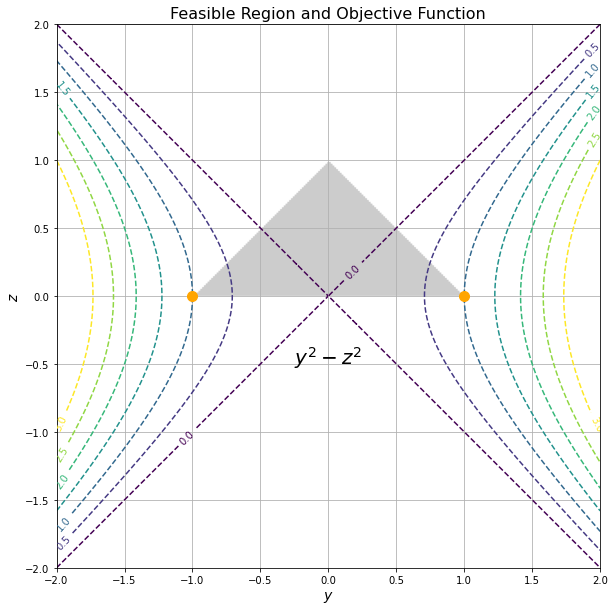

In [99]:
# Will use the same graph dimensions as the first exercise
y, z = np.meshgrid(d, d)

fig_2, ax_2 = plt.subplots(figsize=(10, 10))
fig_2.patch.set_facecolor("xkcd:white")

ax_2.imshow(((abs(y) + z <= 1) & (z >= 0)).astype(int),
          extent=(x.min(), x.max(), y.min(), y.max()),
          origin="lower",
          cmap="Greys",
          alpha = 0.2)

obj = y ** 2 - z ** 2
levels = np.arange(0, 3.5, 0.5)
cp = ax_2.contour(y, z, obj, levels, linestyles="dashed")
ax_2.clabel(cp, inline=True, fontsize=10)

#Plotting solutions
opt_1_y = [-1, 1]
opt_1_z = [0, 0]
ax_2.plot(opt_1_y, opt_1_z, "o", markersize=10, color="orange")

eq = r"$y^{2}-z^{2}$"
ax_2.text(0, -0.5, eq, fontsize=20, ha="center")

ax_2.set_xlabel(r"$y$", size=14)
ax_2.set_ylabel(r"$z$", size=14)
ax_2.set_title("Feasible Region and Objective Function", size=16)
plt.grid()
plt.plot()

The plot above shows that the maximum value of the objective function occurs when:

\begin{array}{cl}
&x = 1,\; &y = -1,\; &z = 0 \\
&x = 1,\; &y = 1,\; &z = 0
\end{array}


And the optimal value is **1**
